<font color='red'>*** travail réalisé par Eya RAYES et Mohamed Ibrahim ABOUDA***</font> 

# 2 Image Preparation and Augmentation for Deep Learning with Keras

>Keras is an open-source high-level Neural Network library, written in Python and running on top of the machine learning platform.

# 2.1 Installation and Setup

In [ ]:
# Requires the latest pip
!C:\Users\INFOTEC\anaconda\envs\tenserflowkeras\python.exe -m pip install --upgrade pip

In [ ]:
# Current stable release’s Tensorflow for CPU and GPU
!pip install tensorflow

In [ ]:
# Install Keras
!pip install keras

# 2.2 Keras Image Augmentation API

>Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation.

# • Horizontal and Vertical Shift Augmentation

In [ ]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()


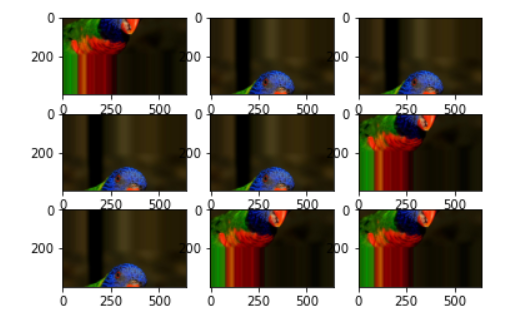

# What do you notice?

>Perform vertical shifts of the image via the height_shift_range=0.5 argument. It specifys the percentage of the image to shift as 0.5 the height of the image.

> We can notice that in some cases the replicated pixels at the edge of the image may not make sense to a model.

# • Horizontal and Vertical Flip Augmentation


> Image flipping reverses the rows or columns of pixels in the case of a vertical or horizontal flip respectively. The flip augmentation is specified by the argument ` horizontal_flip=True` or  `vertical_flip=True` to the ` ImageDataGenerator()` constructor.

In [ ]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200],horizontal_flip=True , vertical_flip=True , rotation_range=90 ,brightness_range=(0.5,0.6))
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

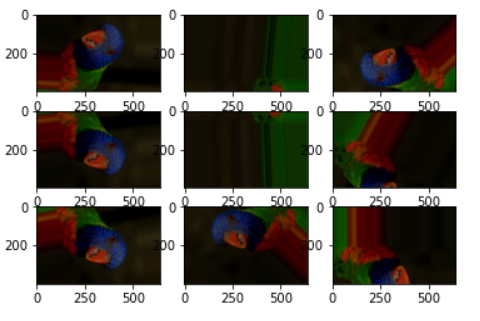


In [ ]:
MNIST : IMPORTING THE DATASET 

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load dbata
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()


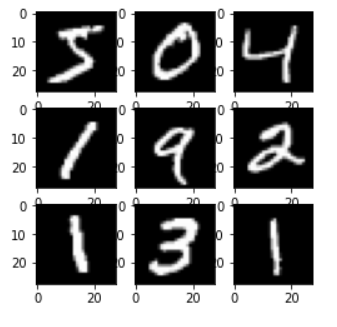

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
 # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True,figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
 # show the plot
    plt.show()
    break

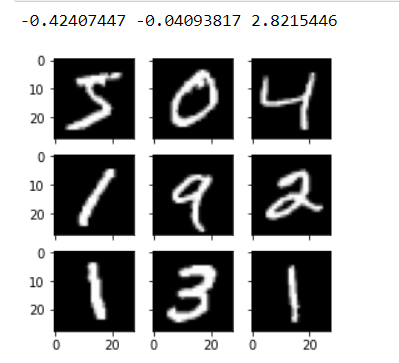



In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
datagen.flow(X_train, y_train, batch_size=9, shuffle=False, save_to_dir='images', save_prefix='aug', save_format='jpg')
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
 # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True,figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
 # show the plot
    plt.show()
    break